# Importation des données
[To Do : continuer de décrire origine et format des données]

Les données sont localisées dans des fichiers XML, chaque fichier correspondant à une demande de brevets. Ces fichiers sont directement téléchargeables depuis le serveur FTP de l'INPI, accessible via FileZilla.

Pour rendre notre projet reproductible au maximum, bien que les données ne puissent pas être directement téléchargées par un utilisateur non autorisé par l'INPI, nous avons stocké les fichiers .zip tels que nous les avons initialement téléchargés dans le bucket diffusion de l'un de nous. 

Concernant leur format, ces fichiers compressés contiennent chacun les informations sur toutes les demandes de brevets déposés auprès de l'INPI chaque semaine. Il y a donc 52 dossiers par année, un pour chaque semaine. Dans ces dossiers, se trouvent des informations dont nous n'avons pas besoin (ex: des schémas d'invention). Nous n'utiliserons que les données présentes dans des fichiers XML, chacun de ces fichiers contenant de nombreuses informations sur une demande de brevet déposée dans la semaine concernée.

Le code suivant se charge de décompresser ces fichiers, d'identifier les fichiers XML au sein de leurs arborescences et d'en extraire toutes les informations.

In [1]:
from scripts.importation import process_all_years_s3

In [ ]:
# Connexion au bucket S3
import s3fs
fs = s3fs.S3FileSystem(client_kwargs={"endpoint_url": "https://minio.lab.sspcloud.fr"})
ROOT_S3_PATH = "mvallat/diffusion/projet"

In [3]:
# NB : ce code tourne +7min
data_brevets = process_all_years_s3(fs, ROOT_S3_PATH)
data_brevets.head(2)

/home/onyxia/work/Projet-Python/scripts/importation.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_year["year"] = year_name
/home/onyxia/work/Projet-Python/scripts/importation.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_year["year"] = year_name


⚠️ Erreur XML dans mvallat/diffusion/projet/2022/FR_FRNEWST36_2022_25.zip/FR_FRNEWST36_2022_25/doc/3118340.xml: no element found: line 1, column 0


/home/onyxia/work/Projet-Python/scripts/importation.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_year["year"] = year_name
/home/onyxia/work/Projet-Python/scripts/importation.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_year["year"] = year_name
/home/onyxia/work/Projet-Python/scripts/importation.py:32: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) i

,doc-number,kind,country,status,publication_country,publication_doc-number,publication_date,publication_bopinum,publication_nature,invention-title,...,citation_3_country,citation_3_doc-number,citation_3_date,year,application_country,application_doc-number,application_date,last-fee-payement,next-fee-payement,date-search-completed
0,3038352,A1,FR,PUBDEM,FR,3038352,20170106,2017-01,Brevet,ENSEMBLE POUR PANNEAU DE PORTE ET PANNEAU ASSOCIE,...,NA,NA,NA,2017,NaN,NaN,NaN,NaN,NaN,NaN
1,3038278,A1,FR,PUBDEM,FR,3038278,20170106,2017-01,Brevet,VEHICULE HYBRIDE COMPRENANT UNE SUPPRESSION DE...,...,NA,NA,NA,2017,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# Exportation bucket S3
MY_BUCKET = "mvallat/diffusion"
FILE_PATH_OUT_S3 = f"{MY_BUCKET}/projet/data_brevets.parquet"

with fs.open(FILE_PATH_OUT_S3, 'wb') as file_out:
    data_brevets.to_parquet(file_out)

Notre base de données est maintenant stockée dans une bucket diffusion sur le ssp cloud, ce qui nous permet de ne pas avoir à repartir des fichiers compressés initiaux. 

**Pour importer directement les données sans passer par les étapes précédentes, on pourra utiliser le code suivant :**

In [7]:
# Importation bucket S3
import pandas as pd
MY_BUCKET = "mvallat/diffusion"
FILE_PATH_S3 = f"{MY_BUCKET}/projet/data_brevets.parquet"

with fs.open(FILE_PATH_S3, 'rb') as file_in:
    data_brevets = pd.read_parquet(file_in)

data_brevets.head(10)

,doc-number,kind,country,status,publication_country,publication_doc-number,publication_date,publication_bopinum,publication_nature,invention-title,...,citation_3_country,citation_3_doc-number,citation_3_date,year,application_country,application_doc-number,application_date,last-fee-payement,next-fee-payement,date-search-completed
0,3038352,A1,FR,PUBDEM,FR,3038352,20170106,2017-01,Brevet,ENSEMBLE POUR PANNEAU DE PORTE ET PANNEAU ASSOCIE,...,NA,NA,NA,2017,None,None,None,None,None,None
1,3038278,A1,FR,PUBDEM,FR,3038278,20170106,2017-01,Brevet,VEHICULE HYBRIDE COMPRENANT UNE SUPPRESSION DE...,...,NA,NA,NA,2017,None,None,None,None,None,None
2,3038409,A1,FR,PUBDEM,FR,3038409,20170106,2017-01,Brevet,PROCEDE DE CONCEPTION ASSISTEE PAR ORDINATEUR ...,...,NA,NA,NA,2017,None,None,None,None,None,None
3,3038425,A1,FR,PUBDEM,FR,3038425,20170106,2017-01,Brevet,DOCUMENT ELECTRONIQUE TEL QU'UNE CARTE A PUCE ...,...,NA,NA,NA,2017,None,None,None,None,None,None
4,3038316,A1,FR,PUBDEM,FR,3038316,20170106,2017-01,Brevet,PROCEDE DE SYNTHESE EN CONTINU D'UN ELASTOMERE...,...,NA,NA,NA,2017,None,None,None,None,None,None
5,3038399,A1,FR,PUBDEM,FR,3038399,20170106,2017-01,Brevet,PROCEDE ET DISPOSITIF DE COMMANDE D'UNE CONSIG...,...,NA,NA,NA,2017,None,None,None,None,None,None
6,3038381,A1,FR,PUBDEM,FR,3038381,20170106,2017-01,Brevet,DISPOSITIF CAPTEUR PREVU POUR ETRE EMBARQUE DE...,...,NA,NA,NA,2017,None,None,None,None,None,None
7,3038328,A1,FR,PUBDEM,FR,3038328,20170106,2017-01,Brevet,VEHICULE FERROVIAIRE POUR LE NETTOYAGE DES FIL...,...,NA,NA,NA,2017,None,None,None,None,None,None
8,3038251,A1,FR,PUBDEM,FR,3038251,20170106,2017-01,Brevet,PLANCHER PVC EN FIBRES COUPEES ET PROCEDE DE F...,...,NA,NA,NA,2017,None,None,None,None,None,None
9,3038374,A1,FR,PUBDEM,FR,3038374,20170106,2017-01,Brevet,INSTALLATION THERMIQUE DE SECHAGE DE MATIERE P...,...,NA,NA,NA,2017,None,None,None,None,None,None


# Nettoyage donnée et focus
Liste des colones et identification des colonnes à supprimer


In [8]:
pd.set_option('display.max_columns', None)


On conserve donc les colonnes date, invention_title, classification_1_text qui correspond à la classification internationale et l'abstract

In [9]:
data_brevets_clean = data_brevets[['publication_date','invention-title','classification_1_text','abstract']]
data_brevets_clean.head(5)

,publication_date,invention-title,classification_1_text,abstract
0,20170106,ENSEMBLE POUR PANNEAU DE PORTE ET PANNEAU ASSOCIE,F16B 5/07 20060101AFI20150702BHFR ...,La présente invention concerne un ensemble (10...
1,20170106,VEHICULE HYBRIDE COMPRENANT UNE SUPPRESSION DE...,B60W 20/00 20060101AFI20150630BHFR ...,Dans un véhicule hybride comprenant un moteur ...
2,20170106,PROCEDE DE CONCEPTION ASSISTEE PAR ORDINATEUR ...,G06F 17/50 20060101AFI20150701BHFR ...,Ce procédé de conception assistée par ordinate...
3,20170106,DOCUMENT ELECTRONIQUE TEL QU'UNE CARTE A PUCE ...,G06K 19/077 20060101AFI20150630BHFR ...,La fabrication d'un document électronique comp...
4,20170106,PROCEDE DE SYNTHESE EN CONTINU D'UN ELASTOMERE...,C08C 19/44 20060101AFI20150702BHFR ...,L'invention concerne un procédé de synthèse en...


première stat desc

ANALYSE PAR SECTION IPC (A, B, C, D, E, F, G, H)

          nombre  pourcentage
section                     
A         16759        14.92
B         30636        27.28
C          7449         6.63
D           662         0.59
E          5577         4.97
F         17207        15.32
G         17883        15.93
H         15887        14.15
N           105         0.09
a             8         0.01
b            47         0.04
c             3         0.00
d             3         0.00
e            13         0.01
f             9         0.01
g            14         0.01
h            33         0.03


/tmp/ipykernel_4676/1170485916.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_brevets_clean['section'] = data_brevets_clean['classification_1_text'].str[0]
/tmp/ipykernel_4676/1170485916.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_brevets_clean['classe'] = data_brevets_clean['classification_1_text'].str[:3]
/tmp/ipykernel_4676/1170485916.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value ins

<Figure size 640x480 with 0 Axes>


ÉVOLUTION PAR SECTION ET PAR ANNÉE
section     A     B     C   D    E     F     G     H  N  a   b  c  d  e  f  \
annee                                                                        
1991.0      1     0     0   0    0     0     0     0  0  0   0  0  0  0  0   
1993.0      1     0     0   0    1     0     1     0  0  0   0  0  0  0  0   
1998.0      0     0     0   0    0     0     0     1  0  0   0  0  0  0  0   
1999.0      2     0     0   0    0     0     0     0  0  0   0  0  0  0  0   
2006.0      3     3     4   1    3     5     3     2  0  0   0  0  0  0  0   
2009.0      1     4     1   0    0     1     0     4  0  0   0  0  0  0  0   
2017.0   2206  3834  1037  76  830  2445  2394  2173  2  0   0  0  0  0  0   
2018.0   2139  3922  1015  96  826  2445  2359  2180  2  0   0  0  0  0  0   
2019.0   2178  3937   936  86  817  2453  2319  2097  0  1   4  0  0  5  2   
2020.0   2029  4079   957  78  690  2326  2365  2028  0  7  43  3  3  8  7   
2021.0   2218  3876   930  9

<Figure size 1400x700 with 0 Axes>

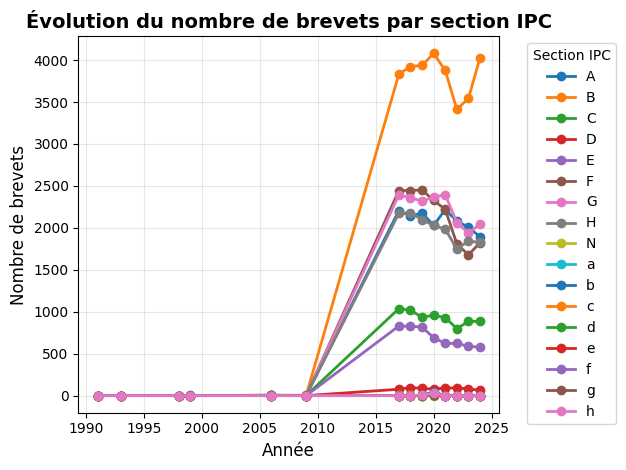

ANALYSE PAR CLASSE IPC (ex: G01, G06, B60, etc.)

Top 20 des classes les plus fréquentes:
        nombre  pourcentage
classe                     
B60      11356        10.11
A61       8291         7.38
G01       6710         5.98
H01       6628         5.90
G06       6408         5.71
F16       4903         4.37
H04       3934         3.50
H02       3741         3.33
B65       2862         2.55
F02       2692         2.40
F01       2633         2.34
B62       2633         2.34
B64       2558         2.28
E04       2236         1.99
A01       2004         1.78
A47       1970         1.75
B29       1913         1.70
C08       1785         1.59
B01       1754         1.56
F21       1449         1.29


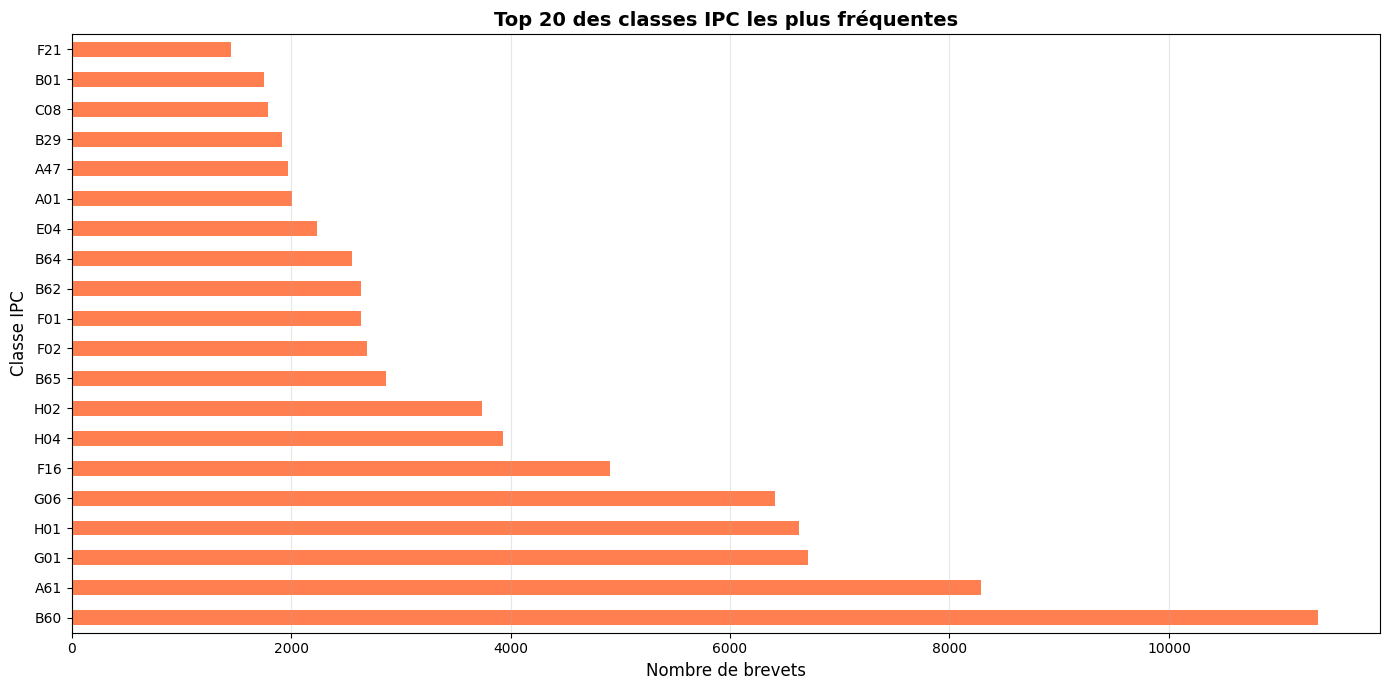


ÉVOLUTION DES TOP 10 CLASSES PAR ANNÉE
classe   A61   B60  B65  F02  F16  G01  G06  H01  H02  H04
annee                                                     
1991.0     1     0    0    0    0    0    0    0    0    0
1993.0     0     0    0    0    0    0    1    0    0    0
1998.0     0     0    0    0    0    0    0    1    0    0
1999.0     1     0    0    0    0    0    0    0    0    0
2006.0     3     1    0    1    1    2    0    1    0    1
2009.0     1     3    0    0    1    0    0    1    1    1
2017.0   998  1361  373  368  796  834  843  844  499  612
2018.0   988  1416  378  407  751  839  787  821  580  542
2019.0  1020  1395  320  397  767  820  847  830  553  521
2020.0   940  1475  370  389  659  880  902  812  442  559
2021.0  1069  1374  410  344  545  894  877  845  451  502
2022.0  1136  1241  388  263  459  829  725  795  405  405
2023.0  1104  1306  313  234  488  818  658  826  409  414
2024.0  1030  1784  310  289  436  794  768  852  401  377


<Figure size 1400x700 with 0 Axes>

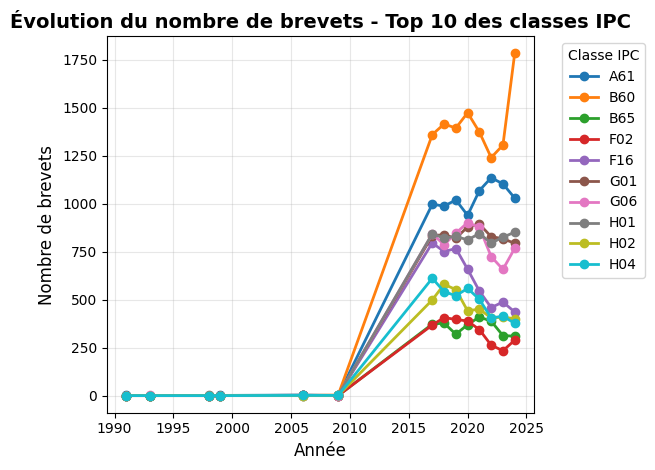

Nombre total de brevets: 112295
Nombre de sections différentes: 17
Nombre de classes différentes: 168
Période couverte: 1991.0 - 2024.0


In [13]:
import matplotlib.pyplot as plt
# Extraire la section (première lettre) et la classe (lettre + 2 chiffres)
data_brevets_clean['section'] = data_brevets_clean['classification_1_text'].str[0]
data_brevets_clean['classe'] = data_brevets_clean['classification_1_text'].str[:3]

# date en datetime et extraction de l'année
data_brevets_clean['publication_date'] = pd.to_datetime(data_brevets_clean['publication_date'], format='%Y%m%d')
data_brevets_clean['annee'] = data_brevets_clean['publication_date'].dt.year

#  ANALYSE PAR SECTION (lettre seule)
print("ANALYSE PAR SECTION IPC (A, B, C, D, E, F, G, H)")

# Comptage par section
comptage_section = data_brevets_clean['section'].value_counts().sort_index()

# Statistiques avec pourcentages
df_stats_section = pd.DataFrame({
    'nombre': comptage_section,
    'pourcentage': (comptage_section / comptage_section.sum() * 100).round(2)
})
print("\n", df_stats_section)


# Graphique en camembert
axes[1].pie(comptage_section, labels=comptage_section.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Répartition en pourcentage', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Évolution temporelle par section
evolution_section = data_brevets_clean.groupby(['annee', 'section']).size().unstack(fill_value=0)
print("\n", "="*60)
print("ÉVOLUTION PAR SECTION ET PAR ANNÉE")
print("="*60)
print(evolution_section)

plt.figure(figsize=(14, 7))
evolution_section.plot(kind='line', marker='o', linewidth=2)
plt.title('Évolution du nombre de brevets par section IPC', fontsize=14, fontweight='bold')
plt.xlabel('Année', fontsize=12)
plt.ylabel('Nombre de brevets', fontsize=12)
plt.legend(title='Section IPC', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# ========== ANALYSE PAR CLASSE (G01, G06, etc.) ==========
print("ANALYSE PAR CLASSE IPC (ex: G01, G06, B60, etc.)")

# Comptage par classe
comptage_classe = data_brevets_clean['classe'].value_counts().sort_values(ascending=False)

# Top 20 des classes les plus fréquentes
top20_classes = comptage_classe.head(20)

# Statistiques avec pourcentages
df_stats_classe = pd.DataFrame({
    'nombre': top20_classes,
    'pourcentage': (top20_classes / comptage_classe.sum() * 100).round(2)
})
print("\nTop 20 des classes les plus fréquentes:")
print(df_stats_classe)

# Visualisation - Top 20 des classes
plt.figure(figsize=(14, 7))
top20_classes.plot(kind='barh', color='coral')
plt.title('Top 20 des classes IPC les plus fréquentes', fontsize=14, fontweight='bold')
plt.xlabel('Nombre de brevets', fontsize=12)
plt.ylabel('Classe IPC', fontsize=12)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# Évolution temporelle des principales classes
top10_classes_names = comptage_classe.head(10).index
evolution_classe = data_brevets_clean[data_brevets_clean['classe'].isin(top10_classes_names)].groupby(['annee', 'classe']).size().unstack(fill_value=0)

print("\n", "="*60)
print("ÉVOLUTION DES TOP 10 CLASSES PAR ANNÉE")
print("="*60)
print(evolution_classe)

plt.figure(figsize=(14, 7))
evolution_classe.plot(kind='line', marker='o', linewidth=2)
plt.title('Évolution du nombre de brevets - Top 10 des classes IPC', fontsize=14, fontweight='bold')
plt.xlabel('Année', fontsize=12)
plt.ylabel('Nombre de brevets', fontsize=12)
plt.legend(title='Classe IPC', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Résumé final
print(f"Nombre total de brevets: {len(data_brevets_clean)}")
print(f"Nombre de sections différentes: {data_brevets_clean['section'].nunique()}")
print(f"Nombre de classes différentes: {data_brevets_clean['classe'].nunique()}")
print(f"Période couverte: {data_brevets_clean['annee'].min()} - {data_brevets_clean['annee'].max()}")


## PorteFeuille ##

D'après stat desc :
B60 = "Vehicles in general"
A61 = "Medical or veterinary science"
G01 = "Measuring" -> Useless
H01 = "Electric elemnts" -> H "Electricity", plus large car chaque sous cat est liée
G06 = "Computing;Calculating or counting"     
F16 = "General measures for producing and maintaning effective functioning of machines or installations; thermal insulation         
B65 = " Conveying; Packing Storing; Handling Thin or Filamentary Material"       
F02 = " Combustion Engines: Hot-Gas Or Combustion engines in general     
                    

Les intéressants : F41 = "Weapons"